# DataLoader Demo
#### This project uses a custom DataLoader to load batches of aircraft images along with their labels.

In [1]:
import sys
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import yaml

import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) # Go up one level from the notebook directory.

# Add the project root to the Python path
sys.path.append(project_root)

from src.data_handler.dataloader import get_data_loaders

In [2]:
split_data_dir = '../data/split'

train_loader, val_loader, test_loader, num_classes, mean, std = get_data_loaders(split_data_dir, 128, 5, full_transform=False)

print('\nNumber of classes:', num_classes)
print('\nMean:', mean)
print('\nStd:', std)
# get some random training images
images, labels = next(iter(train_loader))

print(f'\n{images.shape}')

Train directory: ../data/split/train
Validation directory: ../data/split/validation
Test directory: ../data/split/test
Found 741 files in ../data/split/train
Files found: ['../data/split/train/F14/a7bf760cbed9f80650bd04854557899e_0.jpg', '../data/split/train/F14/ac5d627ba72dbf1f1b9d86c1a69cc8c0_2.jpg', '../data/split/train/F14/db298e988170f1c2a5b697463eb95e33_0.jpg', '../data/split/train/F14/1ef50d5c116d53203d33ee7d415fe7a2_3.jpg', '../data/split/train/F14/d2e2ebdeea9250fb6187b232193c1a40_0.jpg', '../data/split/train/F14/1ef50d5c116d53203d33ee7d415fe7a2_13.jpg', '../data/split/train/F14/d2353274663747bead7192ebdd503dd2_1.jpg', '../data/split/train/F14/7d7e28acf3fba33d205fb6e888cb441f_0.jpg', '../data/split/train/F14/88c2d4d1d4f5ab539558cf4129cd9ef2_1.jpg', '../data/split/train/F14/daed458f102a6a4eae5fb8ea67ba8ac2_0.jpg', '../data/split/train/F14/c5485f76627048925d23b672ed07ba7a_1.jpg', '../data/split/train/F14/88fc7319b8c6b8cdd3f5cb753321e73c_0.jpg', '../data/split/train/F14/0c1bfa59f5

# Visualizing a Batch of Training Images

/tmp/ipykernel_1470391/1241819033.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)


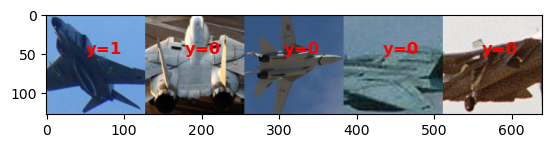

In [3]:
# plot images
plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)
plot_images = (plot_images * 255.0)
plot_images = plot_images.numpy().transpose(0, 2, 3, 1).astype(np.uint8)
plt.imshow(np.hstack(plot_images))
for index, l in enumerate(labels):
    plt.text(index*128+50, 50, "y="+str(l.item()), color='red', fontsize=12,fontweight='bold')
plt.show()